1993.txt
string s 
I am speaking to you from the Library at Sandringham .
here
S
string s 
Four generations of my family have enjoyed the quiet and solitude of this library .
here
S
here
SBAR
here
S
string s 
It is still a haven of peace even if my grandchildren do their best over Christmas to make it rather more lively !
here
S
here
S
here
S
string s 
Most of the books on the shelves date from my great - grandfather ' s time , and their titles reflect the life and events of those days .
here
S
here
S
string s 
Books are one of the ways in which each generation can communicate its history , values and culture to the next .
here
S
here
S
here
SBAR
here
S
here
S
string s 
There are books here about statesmen , explorers , warriors and saints ; there are many about war , especially the First World War which ended seventy - five years ago .
here
S
here
S
here
S
here
S
here
SBAR
string s 
Families and loved ones of those who fought in it knew little of the horrors of the trenches , other th

here
S
here
S
here
S
string s 
If that new dawn is to be a real and not a false one , courage , patience and faith will be sorely needed - those same qualities which kept the flame of hope alive in the war - torn countries of Europe and the Far East in the dark days of the last war .
here
S
here
S
here
SBAR
here
SBAR
string s 
Christ taught us to love our enemies and to do good to them that hate us .
here
S
here
SBAR
string s 
It is a hard lesson to learn , but this year we have seen shining examples of that generosity of spirit which alone can banish division and prejudice .
here
S
here
S
here
S
here
SBAR
string s 
In Northern Ireland , peace is gradually taking root ; a fully democratic South Africa has been welcomed back into the Commonwealth ; and , in the Middle East , long - standing enmities are healing .
here
S
here
S
string s 
What is it that makes people turn from violence , and try to bring peace to their community ?
here
S
here
S
here
SBAR
string s 
Most of all , I believe 

here
S
1995.txt
34.375
average 
3.6875
1996.txt
string s 
To look back is not necessarily to be nostalgic .
here
S
string s 
When I come to Sandringham each year , I like to reflect on what Christmas must have been like when King Eward the seventh , my great - grandfather , and Queen Alexandra first came here as young parents .
here
S
here
S
here
S
here
SBAR
here
S
here
SBAR
here
S
string s 
I remember my own childhood Christmases here , with my father and mother , and a great family gathering , and now I delight in seeing my children and grandchildren enjoying the same traditions .
here
S
here
S
here
S
string s 
Christmas is the celebration of the birth of the founder of the Christian faith , an event which took place almost 2000 years ago ; every year , at this time , we are asked to look back at that extraordinary story and remind ourselves of the message which inspired Christ ' s followers then , and which is just as relevant today .
here
S
here
SBAR
here
SBAR
here
S
here
SBAR
here

here
S
here
SBAR
here
S
string s 
Many of you might have felt a twinge of sadness as we in Britain bade them farewell , but we should be proud of the success of our partnership in Hong Kong and in how peacefully the old Empire has been laid to rest .
here
S
here
SBAR
here
S
here
SBAR
here
S
here
SBAR
here
S
string s 
Out of the old Empire sprang the Commonwealth family of nations that we know today , and that , too , has grown and changed over the years .
here
S
here
SBAR
here
S
here
S
string s 
In October , 51 representatives of Commonwealth governments met in Edinburgh , very much in the spirit of a family gathering .
here
S
here
S
string s 
We all enjoy meeting old friends and making new ones , but there was also important business to be done .
here
S
here
S
here
S
string s 
The world saw that the Commonwealth can make a major contribution to international relations and prosperity .
here
S
here
SBAR
here
S
string s 
The meeting also showed that unity and diversity can go hand in han

here
S
here
SBAR
here
SBAR
here
S
string s 
They give us , with our families , our sense of belonging .
here
S
here
S
string s 
It is they that help define our sense of duty .
here
S
here
SBAR
here
S
string s 
It is they that can make us strong as individuals , and keep the nation ' s heartbeat strong and steady too .
here
S
here
SBAR
here
SBAR
here
S
string s 
Christmas is a good time for us to recognise all that they do for us and to say a heartfelt thank you to each and every one of them .
here
S
here
SBAR
here
S
here
SBAR
here
S
string s 
Happy Christmas to you all .
here
S
1998.txt
20.0
average 
3.375
1999.txt
string s 
A very Happy Christmas to you all .
here
S
string s 
Listening to the choir from Saint George ' s Chapel , Windsor , reminds me that this season of carols and Christmas trees is a time to take stock .
here
S
here
SBAR
here
S
string s 
A time to reflect on the events of the past year and to make resolutions for the new year ahead .
here
S
string s 
This December we 

here
S
here
S
here
S
here
S
string s 
But the true measure of Christ ' s influence is not only in the lives of the saints but also in the good works quietly done by millions of men and women day in and day out throughout the centuries .
here
S
here
S
here
S
here
SBAR
here
S
string s 
Many will have been inspired by Jesus ' simple but powerful teaching : love God and love thy neighbour as thyself - in other words , treat others as you would like them to treat you .
here
S
here
S
here
SBAR
here
S
string s 
His great emphasis was to give spirituality a practical purpose .
here
S
string s 
Whether we believe in God or not , I think most of us have a sense of the spiritual , that recognition of a deeper meaning and purpose in our lives , and I believe that this sense flourishes despite the pressures of our world .
here
S
here
S
here
S
here
S
string s 
This spirituality can be seen in the teachings of other great faiths .
here
S
string s 
Of course religion can be divisive , but the Bible , 

here
S
here
SBAR
here
S
string s 
It is the celebration of the birth of an idea and an ideal .
here
S
string s 
In a different way I felt that the Golden Jubilee was more than just an anniversary .
here
S
here
S
here
SBAR
here
S
string s 
The celebrations were joyous occasions , but they also seemed to evoke something more lasting and profound - a sense of belonging and pride in country , town , or community ; a sense of sharing a common heritage enriched by the cultural , ethnic and religious diversity of our twenty - first century society .
here
S
here
S
here
S
string s 
I hope it also provided an occasion to acknowledge the progress of the past fifty years and the contributions of those who have done so much to make this country what it is today - their leadership and example , their achievements in science , the arts and many other fields .
here
S
here
S
here
S
here
SBAR
here
SBAR
here
S
string s 
These celebrations also gave opportunities to recognise the valuable work undertaken 

here
S
here
SBAR
here
S
here
SBAR
here
SBAR
here
S
string s 
It is vitally important that we all should participate and cooperate for the sake of the wellbeing of the whole community .
here
S
here
SBAR
here
S
string s 
We have only to look around to recognise the benefits of this positive approach in business or local government , in sport , music and the arts .
here
S
string s 
There is certainly much more to be done and many challenges to be overcome .
here
S
string s 
Discrimination still exists .
here
S
string s 
Some people feel that their own beliefs are being threatened .
here
S
here
SBAR
here
S
string s 
Some are unhappy about unfamiliar cultures .
here
S
string s 
They all need to be reassured that there is so much to be gained by reaching out to others ; that diversity is indeed a strength and not a threat .
here
S
here
S
here
SBAR
here
S
here
S
string s 
We need also to realise that peaceful and steady progress in our society of differing cultures and heritage can be threate

here
S
here
S
here
SBAR
here
S
string s 
It is worth bearing in mind that all of our faith communities encourage the bridging of that divide .
here
S
here
S
here
S
string s 
The wisdom and experience of the great religions point to the need to nurture and guide the young , and to encourage respect for the elderly .
here
S
here
S
string s 
Christ himself told his disciples to let the children come to him , and Saint Paul reminded parents to be gentle with their children , and children to appreciate their parents .
here
S
here
S
here
S
string s 
The scriptures and traditions of the other faiths enshrine the same fundamental guidance .
here
S
string s 
It is very easy to concentrate on the differences between the religious faiths and to forget what they have in common .
here
S
here
SBAR
here
S
string s 
People of different faiths are bound together by the need to help the younger generation to become considerate and active citizens .
here
S
here
S
here
S
string s 
And there is another cau

here
S
here
S
string s 
Their successors in theatres such as Iraq and Afghanistan are still to be found in harm ’ s way in the service of others .
here
S
here
S
here
S
string s 
For their loved ones , the worry will never cease until they are safely home .
here
S
here
SBAR
here
S
here
SBAR
here
S
string s 
In such times as these we can all learn some lessons from the past .
here
S
here
S
string s 
We might begin to see things in a new perspective .
here
S
string s 
And certainly , we begin to ask ourselves where it is that we can find lasting happiness .
here
S
here
SBAR
here
S
here
SBAR
here
S
string s 
Over the years , those who have seemed to me to be the most happy , contented and fulfilled have always been the people who have lived the most outgoing and unselfish lives ; the kind of people who are generous with their talents or their time .
here
S
here
S
here
SBAR
here
SBAR
here
SBAR
string s 
There are those who use their prosperity or good fortune for the benefit of others wheth

here
S
here
SBAR
here
S
string s 
Here at Hampton Court in 1604 , he convened a conference of churchmen of all shades of opinion to discuss the future of Christianity in this country .
here
S
here
S
string s 
The King agreed to commission a new translation of the Bible that was acceptable to all parties .
here
S
here
SBAR
here
S
string s 
This was to become the King James or Authorized Bible , which next year will be exactly four centuries old .
here
S
here
S
here
S
here
SBAR
here
S
string s 
Acknowledged as a masterpiece of English prose and the most vivid translation of the scriptures , the glorious language of this Bible has survived the turbulence of history and given many of us the most widely - recognised and beautiful descriptions of the birth of Jesus Christ which we celebrate today .
here
S
here
SBAR
here
S
here
SBAR
here
S
string s 
The King James Bible was a major cooperative endeavour that required the efforts of dozens of the day ’ s leading scholars .
here
S
here
SBAR
her

here
S
here
SBAR
here
S
string s 
Jesus was born into a world full of fear .
here
S
string s 
The angels came to frightened shepherds with hope in their voices : ‘ Fear not ’, they urged , ‘ we bring you tidings of great joy , which shall be to all people .
here
S
here
S
here
S
here
SBAR
string s 
For unto you is born this day in the City of David a Saviour who is Christ the Lord .’
here
S
here
SBAR
string s 
Although we are capable of great acts of kindness , history teaches us that we sometimes need saving from ourselves – from our recklessness or our greed .
here
S
here
S
here
S
string s 
God sent into the world a unique person – neither a philosopher nor a general ( important though they are ) – but a Saviour , with the power to forgive .
here
S
here
S
here
S
here
SBAR
here
S
string s 
Forgiveness lies at the heart of the Christian faith .
here
S
string s 
It can heal broken families , it can restore friendships and it can reconcile divided communities .
here
S
here
S
here
S
here
S

here
S
here
S
here
S
string s 
The anniversary reminded me of the remarkable changes that have occurred since the Coronation , many of them for the better ; and of the things that have remained constant , such as the importance of family , friendship and good neighbourliness .
here
S
here
SBAR
here
S
here
SBAR
string s 
But reflection is not just about looking back .
here
S
string s 
I and many others are looking forward to the Commonwealth Games in Glasgow next year .
here
S
string s 
The baton relay left London in October and is now the other side of the world , on its way across seventy nations and territories before arriving in Scotland next summer .
here
S
here
S
here
S
here
S
string s 
Its journey is a reminder that the Commonwealth can offer us a fresh view of life .
here
S
here
S
here
S
string s 
My son Charles summed this up at the recent meeting in Sri Lanka .
here
S
string s 
He spoke of the Commonwealth ’ s “ family ties ” that are a source of encouragement to many .
here
S

here
S
here
S
string s 
After this touching picture was published , many families wanted a Christmas tree of their own , and the custom soon spread .
here
S
here
S
string s 
In 1949 , I spent Christmas in Malta as a newly - married naval wife .
here
S
here
S
here
S
string s 
We have returned to that island over the years , including last month for a meeting of Commonwealth leaders ; and this year I met another group of leaders .
here
S
here
S
here
S
string s 
The Queen ' s Young Leaders , an inspirational group , each of them a symbol of hope in their own Commonwealth communities .
here
S
here
S
here
S
string s 
Gathering round the tree gives us a chance to think about the year ahead .
here
S
string s 
I am looking forward to a busy 2016 , though I have been warned I may have Happy Birthday sung to me more than once or twice .
here
S
here
SBAR
here
S
string s 
It also allows us to reflect on the year that has passed , as we think of those who are far away or no longer with us .
here
S


here
S
here
S
string s 
It was the humblest of beginnings , and his parents , Joseph and Mary , did not think they were important .
here
S
here
S
here
S
string s 
Jesus Christ lived obscurely for most of his life , and never travelled far .
here
S
here
S
here
S
string s 
He was maligned and rejected by many , though he had done no wrong .
here
S
here
SBAR
here
S
string s 
And yet , billions of people now follow his teaching and find in him the guiding light for their lives .
here
S
here
S
here
S
here
SBAR
here
S
string s 
I am one of them because Christ ’ s example helps me see the value of doing small things with great love , whoever does them and whatever they themselves believe .
here
S
here
S
here
S
here
S
here
S
string s 
The message of Christmas reminds us that inspiration is a gift to be given as well as received , and that love begins small but always grows .
here
S
here
SBAR
string s 
I wish you all a very happy Christmas .
here
S
here
S
2016.txt
29.03225806451613
average 
3.0

here
S
string s 
Perhaps part of that wisdom is to recognise some of life ’ s baffling paradoxes , such as the way human beings have a huge propensity for good , and yet a capacity for evil .
here
S
here
S
here
S
string s 
Even the power of faith , which frequently inspires great generosity and self - sacrifice , can fall victim to tribalism .
here
S
here
S
here
SBAR
here
S
string s 
But through the many changes I have seen over the years , faith , family and friendship have been not only a constant for me but a source of personal comfort and reassurance .
here
S
here
SBAR
here
S
here
S
here
SBAR
here
S
string s 
In April , the Commonwealth Heads of Government met in London .
here
S
here
S
string s 
My father welcomed just 8 countries to the first such meeting in 1948 .
here
S
string s 
Now the Commonwealth includes 53 countries with 2 . 4 billion people , a third of the world ’ s population .
here
S
here
S
here
S
string s 
Its strength lies in the bonds of affection it promotes , and 

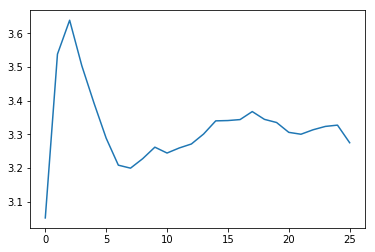

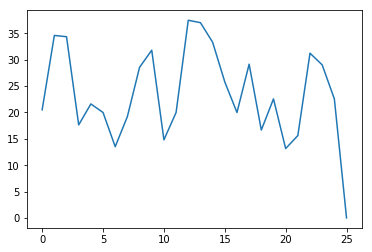

In [4]:
from __future__ import division
import nltk
import os
import sys
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from nltk.parse.api import ParserI
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.sem import lfg
from stat_parser import Parser
from nltk import Tree
from nltk import ne_chunk, pos_tag, word_tokenize

def main():

    parser = Parser()
    #print (parser.parse("How can the net amount of entropy of the universe be massively decreased?"))
    
    newcorpus = PlaintextCorpusReader('data', '.*')
    files = newcorpus.fileids()
    
    count = 0
    verb_count_per_sentence = []
    average = []
    top_verb_counts = []
    sub_average = []
    
    for f in files:
        if f:
            print(f)
            top_count = 0
            sentences = newcorpus.sents(f)
            sentence_count = 0
            sub_count_list = []

            for s in sentences:
                
                sentence_count += 1
                verb_count = 0


                tagged_s = nltk.pos_tag(s)


                string_s = ' '.join(str(se) for se in s)

                if not string_s:
                    continue;
                                             
                print('string s ')
                print(string_s)

                parse_str = parser.parse(string_s)

                string_parse = ' '.join(str(se) for se in parse_str)
                #print(string_parse)
                beginning_s = '(S('
                ending_s = '))'

                input_s = beginning_s + string_parse + ending_s


                t = Tree.fromstring(input_s)

                subtexts = []
                sub_count = 0
                for subtree in t.subtrees():
                    if subtree.label()=="S" or subtree.label()=="SBAR":
                        sub_count += 1
                        print('here')
                        print(subtree.label())
                        subtexts.append(' '.join(subtree.leaves()))

                sub_count_list.append(sub_count)

                #print(parser.parse(string_s))
                #tag s
                for word in tagged_s:
                    if word[1] == 'VB' or word[1] == 'VBG' or word[1] == 'VBD' \
                    or word[1] == 'VBP' or word[1] == 'VBN' or word[1] == 'VBZ':
                        verb_count += 1

                if verb_count >= 5:
                    top_count += 1
                verb_count_per_sentence.append(verb_count)
                
            top_count_prop = ((top_count/sentence_count) * 100)
            print(top_count_prop) 
            top_verb_counts.append(top_count_prop)

            total = 0
            for count in verb_count_per_sentence:
                total += count
            a = (total/len(verb_count_per_sentence))
            average.append(a)
            
            t = sum(sub_count_list)
            average_sub_per_sentence = (t/len(sentences))
            print('average '),
            print(average_sub_per_sentence)
            sub_average.append(average_sub_per_sentence)
            
    print('verbs')    
    plt.plot(average)
    plt.show()
    plt.plot(top_verb_counts)
    plt.show()

    print('embedding')
    plt.plot(sub_average)
    plt.show()
    
if __name__ == "__main__":
    main()

In [28]:
import sys
!{sys.executable} -m pip install pyStatParser

  Could not find a version that satisfies the requirement pyStatParser (from versions: )
No matching distribution found for pyStatParser
